### The German Traffic Sign Benchmark

Student Name 1: Sandra Gómez Gálvez

Student Name 2: Héctor Felipe Mateo Romero

### 1. Download data

In [1]:
"""
# Download the data base
!wget -c http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip
"""

'\n# Download the data base\n!wget -c http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip\n'

In [2]:
"""
!unzip FullIJCNN2013.zip
"""

'\n!unzip FullIJCNN2013.zip\n'

### 2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import np_utils

### 3. Read data & data pre-processing

In [3]:
IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [4]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600] 
va_signs = np.array(train_signs)[600:852]  
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

In [8]:
print(len(train_signs))

852


In [9]:
print(tr_signs.shape)
print(tr_signs.shape[1])
print(tr_labels.shape)
print(tr_labels.shape[0]+va_labels.shape[0]+te_labels.shape[0])


(600, 224, 224, 3)
224
(600, 43)
1213


In [10]:
print(va_signs.shape)
print(va_labels.shape)

(252, 224, 224, 3)
(252, 43)


In [11]:
print(te_signs.shape)
print(te_labels.shape)
print(te_signs[360])

(361, 224, 224, 3)
(361, 43)
[[[0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  ...
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]]

 [[0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  ...
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]]

 [[0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  ...
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]]

 ...

 [[0.11764706 0.11372549 0.11372549]
  [0.11764706 0.11372549 0.11372549]
  [0.11764706 0.11372549 0.11372549]
  ...
  [0.1254902  0.1254902  0.16078432]
  [0.1254902  0.1254902  0.16078432]
  [0.1254902  0.1254902  0.16078432]]

 [[0.11764706 0.11372549 0.11372549]
  [0.117

In [12]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

### Assignment 1: Multi-Layer Perceptron

#### Compile the model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers, regularizers
import keras.backend as K
#K.set_image_data_format('channels_first')

weight_decay = 1e-4

model = Sequential()

model.add(Conv2D(48, kernel_size=(3, 3), padding="same", activation="relu",input_shape=(224,224,3), kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(48, kernel_size=(3, 3), padding="same", activation="relu",kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(96, (3, 3), padding='same',activation='relu', kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(96, (3, 3), padding='same',activation='relu', kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(192, (3, 3), padding='same',activation='relu', kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(192, (3, 3), padding='same',activation='relu', kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(tr_labels.shape[1], activation="softmax"))

opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)        
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 48)      1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 48)      20784     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 48)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 96)      41568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 96)      83040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 96)        0

#### Data augmentation

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False, 
                            featurewise_std_normalization=False, 
                            rotation_range=10.,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.3,
                            shear_range=0.1,
                            horizontal_flip=True)

datagen.fit(tr_signs)

#### Train the model

In [15]:
data = model.fit(datagen.flow(tr_signs, tr_labels, batch_size=32), steps_per_epoch=len(tr_signs)/32, epochs=100, verbose=2, validation_data=(va_signs, va_labels),callbacks=[tensorboard])

start = time()


Epoch 1/100
18/18 - 144s - loss: 6.7191 - accuracy: 0.0683 - val_loss: 3.6243 - val_accuracy: 0.0675
Epoch 2/100
18/18 - 141s - loss: 3.6132 - accuracy: 0.0967 - val_loss: 3.6211 - val_accuracy: 0.0675
Epoch 3/100
18/18 - 144s - loss: 3.4466 - accuracy: 0.1050 - val_loss: 3.3411 - val_accuracy: 0.1468
Epoch 4/100
18/18 - 145s - loss: 3.2130 - accuracy: 0.1533 - val_loss: 3.2616 - val_accuracy: 0.1746
Epoch 5/100
18/18 - 146s - loss: 3.0741 - accuracy: 0.1717 - val_loss: 3.1330 - val_accuracy: 0.2500
Epoch 6/100
18/18 - 145s - loss: 2.9825 - accuracy: 0.1900 - val_loss: 3.0414 - val_accuracy: 0.2659
Epoch 7/100
18/18 - 141s - loss: 2.8391 - accuracy: 0.2800 - val_loss: 2.9907 - val_accuracy: 0.2976
Epoch 8/100
18/18 - 136s - loss: 2.7482 - accuracy: 0.3000 - val_loss: 2.6388 - val_accuracy: 0.4325
Epoch 9/100
18/18 - 138s - loss: 2.4564 - accuracy: 0.3783 - val_loss: 2.6217 - val_accuracy: 0.3849
Epoch 10/100
18/18 - 141s - loss: 2.3843 - accuracy: 0.3467 - val_loss: 2.3433 - val_accura

Epoch 82/100
18/18 - 149s - loss: 0.6547 - accuracy: 0.8017 - val_loss: 1.6775 - val_accuracy: 0.7024
Epoch 83/100
18/18 - 144s - loss: 0.6676 - accuracy: 0.8083 - val_loss: 1.7388 - val_accuracy: 0.7024
Epoch 84/100
18/18 - 147s - loss: 0.7406 - accuracy: 0.7833 - val_loss: 1.7878 - val_accuracy: 0.6746
Epoch 85/100
18/18 - 156s - loss: 0.6749 - accuracy: 0.7950 - val_loss: 1.7408 - val_accuracy: 0.6825
Epoch 86/100
18/18 - 151s - loss: 0.6214 - accuracy: 0.8233 - val_loss: 1.7028 - val_accuracy: 0.6706
Epoch 87/100
18/18 - 149s - loss: 0.6494 - accuracy: 0.8117 - val_loss: 1.7383 - val_accuracy: 0.6746
Epoch 88/100
18/18 - 150s - loss: 0.6484 - accuracy: 0.8200 - val_loss: 1.7376 - val_accuracy: 0.6984
Epoch 89/100
18/18 - 147s - loss: 0.6329 - accuracy: 0.8083 - val_loss: 1.8929 - val_accuracy: 0.7063
Epoch 90/100
18/18 - 147s - loss: 0.5635 - accuracy: 0.8483 - val_loss: 1.6761 - val_accuracy: 0.7103
Epoch 91/100
18/18 - 151s - loss: 0.6039 - accuracy: 0.8317 - val_loss: 1.8912 - v

#### Get the results

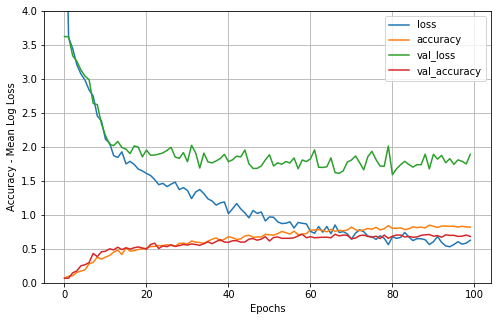

        loss  accuracy  val_loss  val_accuracy
99  0.625724  0.818333   1.88994       0.68254


In [16]:
results=pd.DataFrame(data.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 4) # set the vertical range to [0-1]
plt.show()
print(results[-1:])

#### Final Test

In [17]:

loss, acc = model.evaluate(te_signs, te_labels, verbose=0)
end = time()
#print('MLP took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))


Test loss: 1.4171252250671387 - Accuracy: 0.7036011219024658
